## 1.Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

##  2.Data Preprocessing

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')

In [3]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [4]:
df.columns = df.columns.str.lstrip()

In [5]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [6]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [9]:
df.shape

(4269, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [11]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


 Graduate        2144
 Not Graduate    2125
Name: education, dtype: int64


<Axes: xlabel='education', ylabel='count'>

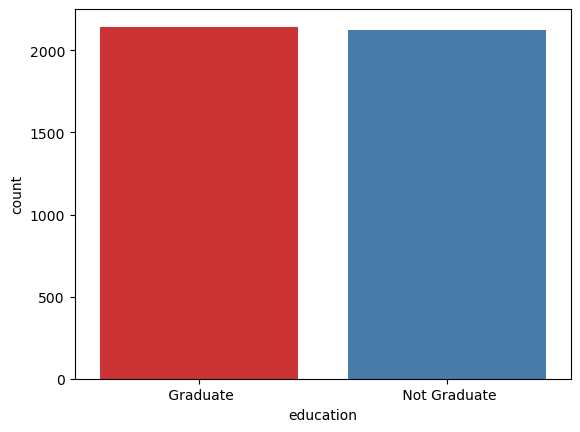

In [12]:
print(df['education'].value_counts())
sns.countplot(x = 'education',data = df, palette = 'Set1')

 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64


<Axes: xlabel='loan_status', ylabel='count'>

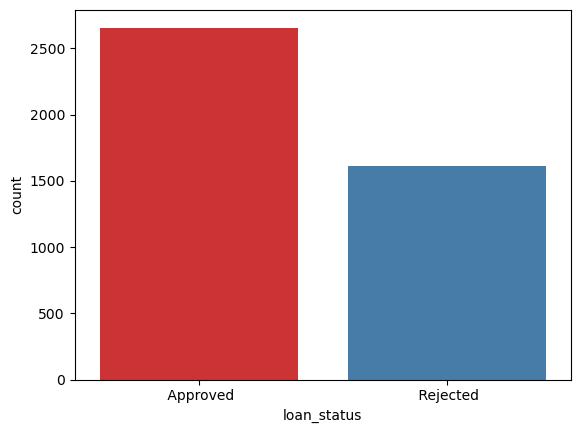

In [13]:
print(df['loan_status'].value_counts())
sns.countplot(x = 'loan_status',data = df, palette = 'Set1')

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['education']=le.fit_transform(df['education'])
df['self_employed']=le.fit_transform(df['self_employed'])
df['loan_status']=le.fit_transform(df['loan_status'])

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


#  Feature Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [16]:
df = df.drop('loan_id',axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   int32
 2   self_employed             4269 non-null   int32
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
 11  loan_status               4269 non-null   int32
dtypes: int32(3), int64(9)
memory usage: 350.3 KB


In [17]:
newcol = []
for col in df.columns:
    if df[col].dtype == 'int64':
        newcol.append(col)
        
print(newcol)

['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


In [18]:
for col in newcol:
    df[[col]] = sc.fit_transform(df[[col]])
    
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.4,0,0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0
1,0.0,1,1,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1
2,0.6,0,0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,1
3,0.6,0,0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,1
4,1.0,1,1,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1


In [19]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#  3.Model Selection

In [21]:
#from sklearn.svm import SVC#(0.9487554904831625)
#from sklearn.linear_model import LogisticRegression#(0.9183016105417277)
#from sklearn.tree import DecisionTreeClassifier#(1.0)
from sklearn.ensemble import RandomForestClassifier#(0.9988286969253294)

In [22]:
# model = {
#     'LogisticRegression': LogisticRegression(),
#     'DecisionTreeClassifier': DecisionTreeClassifier(),
#     'SVC': SVC(),
#     'RandomForestClassifier': RandomForestClassifier()
# }

In [23]:
#classifier = SVC(kernel = 'rbf', random_state = 0)
#classifier = LogisticRegression(random_state = 0)
#classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state = 0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)
y_pred = classifier.predict(X_train)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)

0.9709465791940018

# Going Forward with Random Forest model 

In [39]:
classifier.fit(X_test,y_test)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [40]:
y_pred_test = classifier.predict(X_test)

In [41]:
accuracy_score(y_test,y_pred_test)

0.9962546816479401